In [7]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
import matplotlib.pyplot as plt

dataname = 'cora'       # 'cora' or 'citeseer' or 'pubmed'
model = 'arga_ae'          # 'arga_ae' or 'arga_vae'
task = 'clustering'

In [51]:
def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
objects = []
for i in range(len(names)):
    objects.append(pkl.load(open("data/ind.{}.{}".format(dataname, names[i]),'rb'),encoding='latin1'))
x, y, tx, ty, allx, ally, graph = tuple(objects)
test_idx_reorder = parse_index_file("data/ind.{}.test.index".format(dataname))
test_idx_range = np.sort(test_idx_reorder)

features = sp.vstack((allx, tx)).tolil()
features[test_idx_reorder, :] = features[test_idx_range, :]
adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

labels = np.vstack((ally, ty))
labels[test_idx_reorder, :] = labels[test_idx_range, :]

idx_test = test_idx_range.tolist()
idx_train = range(len(y))
idx_val = range(len(y), len(y) + 500)

train_mask = sample_mask(idx_train, labels.shape[0])
val_mask = sample_mask(idx_val, labels.shape[0])
test_mask = sample_mask(idx_test, labels.shape[0])

y_train = np.zeros(labels.shape)
y_val = np.zeros(labels.shape)
y_test = np.zeros(labels.shape)
y_train[train_mask, :] = labels[train_mask, :]
y_val[val_mask, :] = labels[val_mask, :]
y_test[test_mask, :] = labels[test_mask, :]

true_labels = np.argmax(labels,1)

In [57]:
from preprocessing import preprocess_graph, sparse_to_tuple

features_t = sparse_to_tuple(features.tocoo())
num_features = features_t[2][1]
features_nonzero = features_t[1].shape[0]

In [62]:
objects[4]

<1708x1433 sparse matrix of type '<class 'numpy.float32'>'
	with 31261 stored elements in Compressed Sparse Row format>

In [36]:
A = [[1,2,1],[2,1,0],[1,0,1]]
B = nx.adjacency_matrix(nx.from_scipy_sparse_matrix(sp.coo_matrix(A)))

In [37]:
adj = B
pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum()
pos_weight

0.0

In [38]:
norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2)
norm

ZeroDivisionError: float division by zero

In [25]:
from clusc.utils import *
adj_orig = B
sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements (1 diagonals) in DIAgonal format>

In [22]:
from clusc.utils import *
adj_orig = B
adj_orig.diagonal()
adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)

In [48]:
D = np.zeros((3, 3))
D[0][0] = 1
D[0][1] = 6
D[1][1] = 1
D[2][0] = 2
D[2][2] = 1

In [66]:
B = sp.coo_matrix(D).tolil()
B

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in LInked List format>

In [50]:
C = nx.from_scipy_sparse_matrix(B)
C

In [51]:
C[0][1]

{'weight': 6.0}

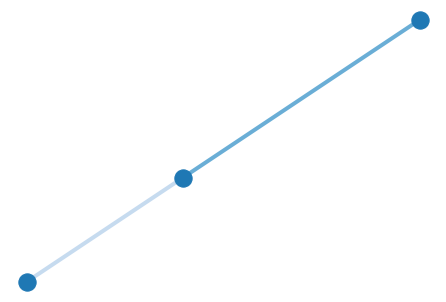

In [61]:
nx.draw(C, edge_cmap=plt.cm.Blues, width=4, edge_color=range(5))
plt.show()

In [26]:
dd = dict()
xxx = ["chr1", 0 , 1]
a = "{}:{}-{}".format(xxx[0],xxx[1],xxx[2])
dd.update({0:a})

In [27]:
dd

{0: 'chr1:0-1'}

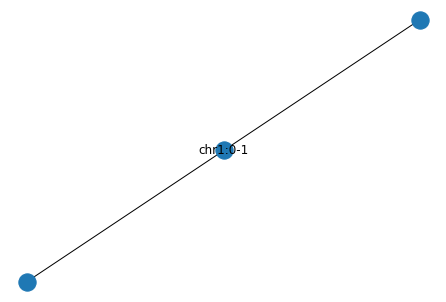

In [18]:
nx.draw(C, with_labels=True, labels=dd)
plt.show()

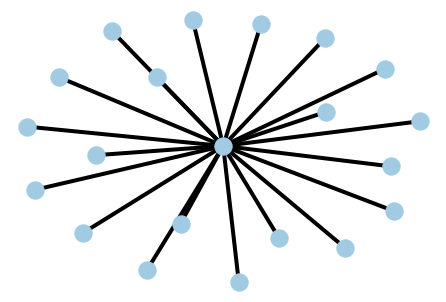

In [59]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    #"edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [1]:
import pickle as pkl
pkl.load(open("data/ind.cora.graph",'rb'),encoding='latin1')

defaultdict(list,
            {0: [633, 1862, 2582],
             1: [2, 652, 654],
             2: [1986, 332, 1666, 1, 1454],
             3: [2544],
             4: [2176, 1016, 2176, 1761, 1256, 2175],
             5: [1629, 2546, 1659, 1659],
             6: [1416, 1602, 1042, 373],
             7: [208],
             8: [281, 1996, 269],
             9: [2614, 723, 723],
             10: [476, 2545],
             11: [1655, 1839],
             12: [2661, 1001, 1318, 2662],
             13: [1810, 1701],
             14: [2034, 2075, 158, 2077, 2668],
             15: [2367, 1093, 1090, 1271, 1093],
             16: [2444, 1632, 970, 2642],
             17: [24, 2140, 1316, 1315, 927],
             18: [2082, 139, 1786, 1560, 2145],
             19: [1939],
             20: [1072, 2374, 2375, 2269, 2270],
             21: [1043, 2310],
             22: [1703, 1702, 2238, 39, 1234],
             23: [2159],
             24: [1701, 2139, 1636, 17, 2141, 598, 201],
             25: [